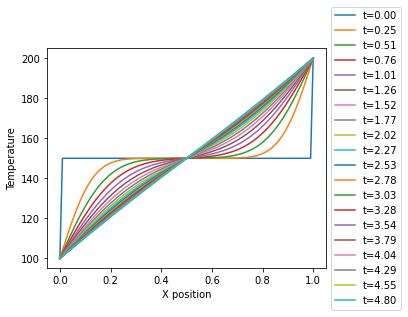

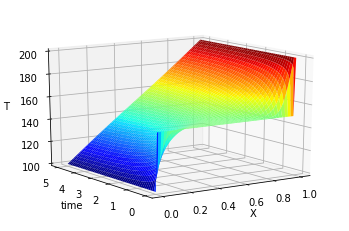

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

N = 100  # number of points to discretize
L = 1.0
X = np.linspace(0, L, N) # position along the rod
h = L / (N - 1)

k = 0.02

def odefunc(u, t):
    dudt = np.zeros(X.shape)

    dudt[0] = 0 # constant at boundary condition
    dudt[-1] = 0

    # now for the internal nodes
    for i in range(1, N-1):
        dudt[i] = k * (u[i + 1] - 2*u[i] + u[i - 1]) / h**2

    return dudt

init = 150.0 * np.ones(X.shape) # initial temperature
init[0] = 100.0  # one boundary condition
init[-1] = 200.0 # the other boundary condition

tspan = np.linspace(0.0, 5.0, 100)
sol = odeint(odefunc, init, tspan)


for i in range(0, len(tspan), 5):
    plt.plot(X, sol[i], label='t={0:1.2f}'.format(tspan[i]))

# put legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X position')
plt.ylabel('Temperature')

# adjust figure edges so the legend is in the figure
plt.subplots_adjust(top=0.89, right=0.77)
plt.savefig('pde-transient-heat-1.png')


# Make a 3d figure
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(X, tspan)
ax.plot_surface(SX, ST, sol, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('time')
ax.set_zlabel('T')
ax.view_init(elev=15, azim=-124) # adjust view so it is easy to see
plt.savefig('pde-transient-heat-3d.png')

